<a href="https://colab.research.google.com/github/GulnazAleksashova/Text-recognition-on-a-driver-s-license/blob/main/driver_license_PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GitHub repo installation of paddle
!python -m pip install paddlepaddle-gpu==2.2.0 -i https://mirror.baidu.com/pypi/simple

In [ ]:
# Install paddle OCR
!pip install paddleocr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/OCR

/content/drive/My Drive/OCR


In [ ]:
# Clone paddle OCR repo - get FONTS for visualization
!git clone https://github.com/PaddlePaddle/PaddleOCR

In [ ]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt      # plot images
import cv2                                # opencv
import os                                 # folder directory navigation

***Instantiate Model and Detect***

In [ ]:
# Setup model
ocr_model = PaddleOCR(use_angle_cls=True, lang='en')

[2022/06/16 09:07:28] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [ ]:
img_path = os.path.join('.', '03.jpg')

In [ ]:
result = ocr_model.ocr(img_path)

[2022/06/16 09:07:32] ppocr DEBUG: dt_boxes num : 21, elapse : 0.027001619338989258
[2022/06/16 09:07:32] ppocr DEBUG: cls num  : 21, elapse : 0.0159456729888916
[2022/06/16 09:07:33] ppocr DEBUG: rec_res num  : 21, elapse : 0.07097172737121582


In [ ]:
result

[[[[66.0, 18.0], [173.0, 15.0], [174.0, 40.0], [67.0, 42.0]],
  ('NEW', 0.8462831377983093)],
 [[[176.0, 16.0], [471.0, 16.0], [471.0, 39.0], [176.0, 39.0]],
  ('YORKSTAE', 0.9204055666923523)],
 [[[122.0, 65.0], [262.0, 65.0], [262.0, 78.0], [122.0, 78.0]],
  ('Commissioner of Motor Vehicles', 0.9485231041908264)],
 [[[270.0, 88.0], [443.0, 88.0], [443.0, 101.0], [270.0, 101.0]],
  ('ENHANCED', 0.993590235710144)],
 [[[208.0, 112.0], [508.0, 112.0], [508.0, 132.0], [208.0, 132.0]],
  ('DRVEREICENSE', 0.9038643836975098)],
 [[[207.0, 149.0], [365.0, 149.0], [365.0, 169.0], [207.0, 169.0]],
  ('ID012345678', 0.9912838339805603)],
 [[[414.0, 147.0], [510.0, 149.0], [509.0, 170.0], [413.0, 167.0]],
  ('CLASSD', 0.991326630115509)],
 [[[208.0, 175.0], [294.0, 175.0], [294.0, 189.0], [208.0, 189.0]],
  ('DOCUMENT', 0.998137891292572)],
 [[[207.0, 190.0], [342.0, 190.0], [342.0, 206.0], [207.0, 206.0]],
  ('SAMPLE,LICENSE', 0.9588395953178406)],
 [[[208.0, 210.0], [358.0, 210.0], [358.0, 224

In [ ]:
for res in result:
    print(res[1][0]) 

NEW
YORKSTAE
Commissioner of Motor Vehicles
ENHANCED
DRVEREICENSE
ID012345678
CLASSD
DOCUMENT
SAMPLE,LICENSE
2345ANYPLACEAVE
ANYTOWN NY12345
DOB:06-09-85
SEXF EYES:BR HT:5-09
Somob Lionne Dowment
E:NONE
RNONE
ISSUED:09-30-08
EXPIRES:10-01-16
8AJ120T521


***Visualise Results***

In [ ]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [ ]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [ ]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

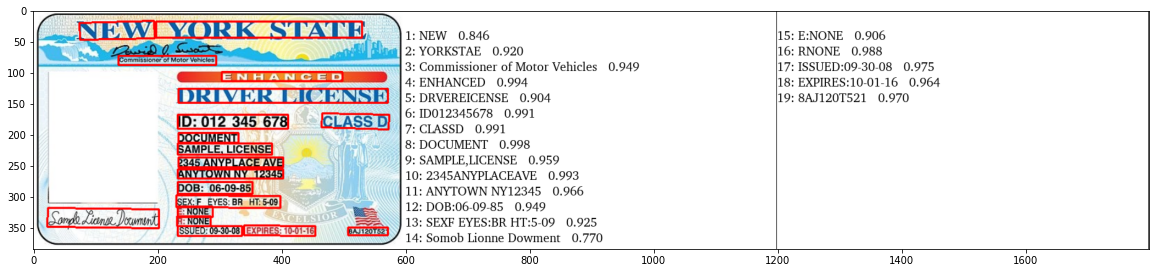

In [ ]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(20,20))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 